In [1]:
import cv2
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import time
import os
from colorama import Fore, Back, Style
import datetime
from matplotlib import cm

In [2]:
static_counter=[0]
motion_counter=[0]
static_back = []
WAIT_TIME=10

SELECTED_DEPTH=2.1
SELECTED_DEPTH_CAMERA=1.1

SENSITIVITY=10

df_emploees = pd.DataFrame(columns=['name','image','keypoints','descriptor','face_shape'])
print(df_emploees)

Empty DataFrame
Columns: [name, image, keypoints, descriptor, face_shape]
Index: []


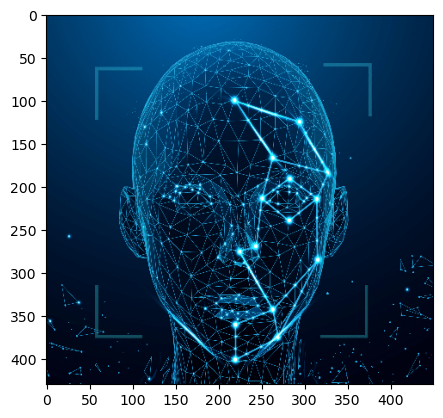

In [3]:
preview=cv2.imread('face_recognition_preview.png',-1)
newsize = (450, 430)
preview = cv2.resize(preview , newsize)
plt.imshow(cv2.cvtColor(preview , cv2.COLOR_BGR2RGB))

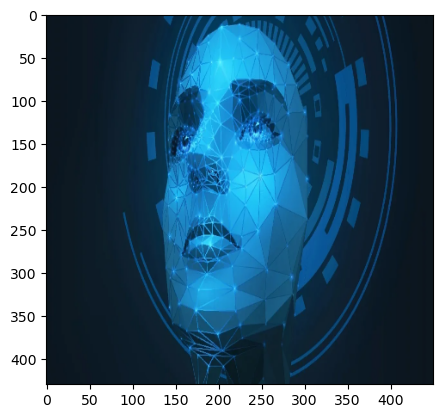

In [4]:
face=cv2.imread('face.webp',-1)
newsize = (450, 430)
face = cv2.resize(face , newsize)
plt.imshow(cv2.cvtColor(face , cv2.COLOR_BGR2RGB))

In [5]:
def add_emploee(df , mlist):
    df = pd.concat([pd.DataFrame([mlist] , columns=df.columns), df], ignore_index=True)
    return df

In [6]:
def check_emp_existance(df_emploees, culomn, item):
    return df_emploees[culomn].isin([item]).any()
    
#check_emp_existance(df_emploees,'name','azi_rastgoo')

In [7]:
def get_SIFT(img):
    img_gray=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptor = sift.detectAndCompute(img_gray , mask=None)
    draw_keypoint=cv2.drawKeypoints(img_gray ,keypoints ,0 ,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #plt.imshow(draw_keypoint)
    return keypoints, descriptor

#get_SIFT(emploee_img)

1


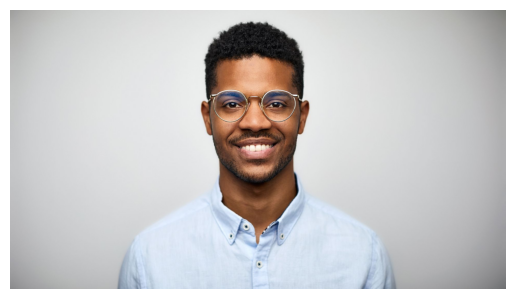

In [8]:
def face_detect(frame , depth):
    haarcascade_path='haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(haarcascade_path) 
    faces = face_cascade.detectMultiScale(frame, depth, 5)
    return faces
       
three=cv2.imread('my_eploee/samoel_haris.jpg',-1)
plt.axis('off')
plt.imshow(cv2.cvtColor(three , cv2.COLOR_BGR2RGB))
faces = face_detect(three , 2.1)
print(len(faces))


(311, 475)
1
one face detected


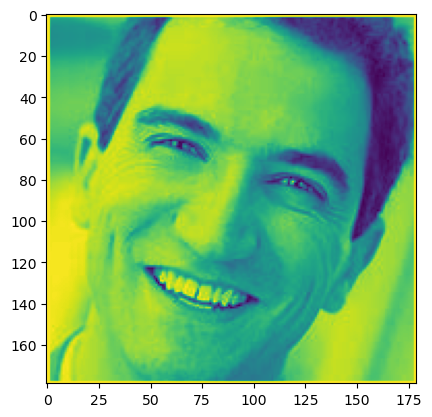

In [9]:
def resize_img(image , box):
    (x,y,w,h)=box
    img=image[y:y+h, x:x+w]
    #plt.imshow(img)
    return img

path = 'OIP.jpg'
image = cv2.imread(path,0)
print(image.shape)

faces = face_detect(image , 1.3)
print(len(faces))

if len(faces)>1:
    print('more than one person is not allowed')
elif len(faces)==1:
    print('one face detected')
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2)
        resized_img=resize_img(image , (x,y,w,h))

    plt.imshow(resized_img)

In [10]:
def check_motion(img_gray,static_back):
    # Converting gray scale image to GaussianBlur so that change can be find easily
        
    if static_back is None:
        static_back = img_gray
        #continue
    img_gray = cv2.GaussianBlur(img_gray, (21, 21), 0)
    #static_back = cv2.GaussianBlur(static_back, (21, 21), 0)
  
    # Difference between static background and current frame(which is GaussianBlur)
    diff_frame = cv2.absdiff(static_back, img_gray)
        
    # If change in between static background and current frame is greater than 10 it will show camera
    ret, thresh1 = cv2.threshold(diff_frame, 120, 255, cv2.THRESH_BINARY)
    
    diff_frame=np.count_nonzero(thresh1)
    
    if(diff_frame > 5):
        return True ,diff_frame
    else:
        return False ,diff_frame
    
       
"""Screenshot_1=cv2.imread('Screenshot_1.png',-1)        
Screenshot_2=cv2.imread('Screenshot_2.png',-1) 

print(Screenshot_1.shape)
print(Screenshot_2.shape)

Screenshot_1=resize_img(Screenshot_1 , (0,0,1100,1500))
Screenshot_2=resize_img(Screenshot_2 , (0,0,1100,1500))

print(Screenshot_1.shape)
print(Screenshot_2.shape)

check_motion(Screenshot_1,None)"""



"Screenshot_1=cv2.imread('Screenshot_1.png',-1)        \nScreenshot_2=cv2.imread('Screenshot_2.png',-1) \n\nprint(Screenshot_1.shape)\nprint(Screenshot_2.shape)\n\nScreenshot_1=resize_img(Screenshot_1 , (0,0,1100,1500))\nScreenshot_2=resize_img(Screenshot_2 , (0,0,1100,1500))\n\nprint(Screenshot_1.shape)\nprint(Screenshot_2.shape)\n\ncheck_motion(Screenshot_1,None)"

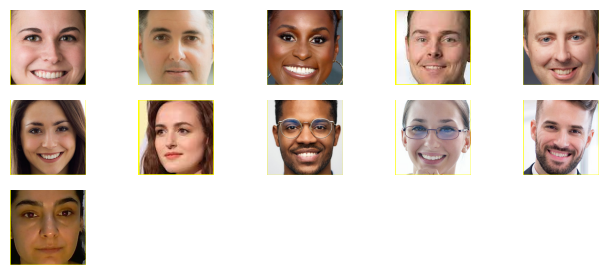

11


In [11]:
def get_current_emploee(my_dataframe):
    faces=[]
    path = os.path.join(os.getcwd(), 'my_eploee')
    files = os.listdir(path)

    fig = plt.figure(figsize=(8, 8))
    columns = 5
    rows = 7
    i=1
    if len(files)>0:
        for file in files:
            emploee_img = cv2.imread(os.path.join(path, file),-1)
            emploee_img = cv2.cvtColor(emploee_img , cv2.COLOR_BGR2RGB)
            full_img = emploee_img.copy()
            
            faces=face_detect(emploee_img , SELECTED_DEPTH)

            for (x,y,w,h) in faces:
                # To draw a rectangle in a face
                cv2.rectangle(emploee_img,(x,y),(x+w,y+h),(255,255,0),2)
                face_reshaped_img=resize_img(emploee_img , (x,y,w,h))
                is_added=check_emp_existance(df_emploees, 'name', file.split('.')[0])
                if(not is_added):
                    keypoints,descriptor = get_SIFT(face_reshaped_img)
                    my_dataframe = add_emploee(my_dataframe, [file.split('.')[0] , full_img, keypoints, descriptor, face_reshaped_img.shape])
                
                fig.add_subplot(rows, columns, i)
                plt.axis('off')
                plt.imshow(face_reshaped_img)
                i+=1
        plt.show()
    else:
        print('there is no emploee')
    return my_dataframe


df_emploees.iloc[0:0]

df_emploees = get_current_emploee(df_emploees)        
print(len(df_emploees))



In [12]:
def sift_similarity(frame , keypoint_frame, descriptor_frame , df_emploees):
    #bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    
    bf=cv2.BFMatcher()
    emp_index=None
    selected_goodmatch=[]
    
    for i in range(len(df_emploees)):
        
        matches = bf.knnMatch(df_emploees.iloc[i][3], descriptor_frame , k=2)
        good_matches=[]

        for m , n in matches:
            if m.distance < 0.7*n.distance:
                good_matches.append(m)
        
        if(len(good_matches) > len(selected_goodmatch)):
            selected_goodmatch=good_matches
            emp_index=i
    
    #SENSITIVITY=5
    if(len(selected_goodmatch)>SENSITIVITY):
        
        emploee_name = df_emploees.iloc[emp_index][0]
        emploee_img = df_emploees.iloc[emp_index][1]
        
        result=(True ,emploee_name,emploee_img)
    else:
        result=(False ,'',face)
        
    return result
    
    
    #/////////////////////////////////////////////////////////////////////////


               
"""        
img=cv2.imread('my_eploee/samoel_haris.jpg',-1)
faces = face_detect(img , 2.1)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
    face_reshaped_img=resize_img(img , (x,y,w,h))
    
keypoints_frame, descriptor_frame = get_SIFT(face_reshaped_img)
#print(df_emploees.iloc[i][1].shape)


bounding_box=sift_similarity(three ,keypoints_frame, descriptor_frame , df_emploees)
cv2.namedWindow('bounding box', cv2.WINDOW_NORMAL)
cv2.resizeWindow('bounding box', 400, 400)
cv2.imshow('bounding box', bounding_box)

if cv2.waitKey(1) & 0xFF==ord("q"):
    cv2.destroyAllWindows()                """

'        \nimg=cv2.imread(\'my_eploee/samoel_haris.jpg\',-1)\nfaces = face_detect(img , 2.1)\nfor (x,y,w,h) in faces:\n    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)\n    face_reshaped_img=resize_img(img , (x,y,w,h))\n    \nkeypoints_frame, descriptor_frame = get_SIFT(face_reshaped_img)\n#print(df_emploees.iloc[i][1].shape)\n\n\nbounding_box=sift_similarity(three ,keypoints_frame, descriptor_frame , df_emploees)\ncv2.namedWindow(\'bounding box\', cv2.WINDOW_NORMAL)\ncv2.resizeWindow(\'bounding box\', 400, 400)\ncv2.imshow(\'bounding box\', bounding_box)\n\nif cv2.waitKey(1) & 0xFF==ord("q"):\n    cv2.destroyAllWindows()                '

In [13]:
def get_time():
    millisec = int(round(time.time() * 1000))
    return millisec

In [14]:
def second_process2(ret, img ,static_back ): 
    motion ,diff = check_motion(img , static_back[-1])
    del static_back[:]
    static_back.append(img.copy())
    emploee_exist=False
    name=' '
    profile=face
    
    if(motion or motion_counter[0]):
        del static_counter[:]
        static_counter.append(0)
        
        if(motion):
            del motion_counter[:]
            motion_counter.append(True)
            motion_counter.append(get_time())
        
        if(((get_time()-motion_counter[1])/1000)>WAIT_TIME):
            motion_counter[0]=False
        
        faces = face_detect(img ,SELECTED_DEPTH_CAMERA)

        if len(faces)>1:
            print('more than one person is not allowed')

        elif len(faces)==0:
            print("no face detected") 
        else:
            for (x,y,w,h) in faces:
                # To draw a rectangle in a face
                cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
                face_reshaped_img=resize_img(img , (x,y,w,h))
            
            keypoints_frame, descriptor_frame = get_SIFT(face_reshaped_img)
            emploee_exist ,name , profile = sift_similarity(img ,keypoints_frame, descriptor_frame , df_emploees)
    else:
        static_counter.append(static_counter[-1]+1)
        if len(static_counter) >= 50:
            del motion_counter[:]
            motion_counter.append(False)
            img=preview
        
    return img , emploee_exist ,name , profile

In [15]:
from tkinter_webcam import webcam
import tkinter as tk
import cv2
from PIL import Image, ImageTk
static_back = []

root = tk.Tk()  
root.geometry('700x600')
root.title('rollcall app')
root.bind('<Escape>', lambda e: root.quit())

first_frame = tk.Frame(root, bg='white', width=700, height=400)
first_right_frame = tk.Frame(first_frame, bg='white', width=300, height=400)
first_left_frame = tk.Frame(first_frame, bg='white', width=400, height=400,padx=20, pady=20)
second_frame = tk.Frame(root, bg='lavender', width=700, height=200, padx=3, pady=3)
#third_frame = tk.Frame(root, bg='lavender', width=700, height=100, padx=3, pady=3)

root.grid_rowconfigure(3, weight=1)
root.grid_columnconfigure(1, weight=1)

first_frame.grid_rowconfigure(1, weight=1)
first_frame.grid_columnconfigure(2, weight=1)

first_right_frame.grid(row=1, column=2)
first_right_frame.grid(row=1, column=1)

first_left_frame.grid_rowconfigure(1, weight=1)
first_left_frame.grid_columnconfigure(1, weight=1)

second_frame.grid_rowconfigure(1, weight=1)
second_frame.grid_columnconfigure(1, weight=1)

#third_frame.grid_rowconfigure(1, weight=1)
#third_frame.grid_columnconfigure(1, weight=1)

first_frame.grid(row=0, column=0, sticky="nsew")
first_right_frame.grid(row=0, column=0, sticky="nsew")
first_left_frame.grid(row=0, column=1)
second_frame.grid(row=1, column=0 , sticky="nsew")
#third_frame.grid(row=2, column=0 , sticky="nsew")

label1=tk.Label( first_right_frame, text='Please stand infront of the camera', font=("Arial",12),padx=13, pady=13)
label1.grid(row=1, column=0)
label1.place(x=20,y=100,height=70,width=250)

status_variable=tk.StringVar()
status_label=tk.Label( first_right_frame,bg='white', textvariable=status_variable , font=("Arial",12),padx=13, pady=13)
status_label.grid(row=1, column=0)
status_label.place(x=20,y=200,height=50,width=250)

emp_img = tk.Label(second_frame ,bg='pink', text='')
emp_img.place(x=80,y=20 ,height=100,width=100)

emp_name_label=tk.Label(second_frame ,bg='lavender', text='EMPLOYEE NAME:', font=("Arial",10))
emp_name_label.place(x=280,y=20,height=50,width=180)

emp_name_variable = tk.StringVar()
emp_name=tk.Label(second_frame, textvariable=emp_name_variable ,bg='lavender', font=("Arial",13),foreground='green')
emp_name.place(x=430,y=20,height=50,width=150)

chbox_variable = tk.IntVar(value=0)  
chbox_message_variable=tk.StringVar()
chbox_status=tk.Checkbutton(second_frame,bg='lavender', variable =chbox_variable, textvariable=chbox_message_variable,
                            font=("Arial",13),onvalue=1,
                            offvalue=0,foreground='green')
chbox_status.place(x=302,y=70)

model_label = tk.Label(first_left_frame , text=' img',width=350, height=350 ,padx=10, pady=10)
model_label.grid(row=0, column=1)
model_label.place(x=0,y=0)

cap = cv2.VideoCapture(0)

def video_stream():
    status_variable.set('in progress...')
    #print('video_stream')
    ret , frame = cap.read()
    if not ret:
        print ('sth is wrong with reading frames')    
    ret , frame = cap.read()
    
    if(len(static_back)==0):
        static_back.append(frame)
    
    frame, is_emploee ,emploee_name , profile_img = second_process2(ret, frame ,static_back)
    if(is_emploee):
        now = datetime.datetime.now()
        emp_name_variable.set(emploee_name)
        chbox_message_variable.set('wellcome.  '+str(now))
       
        cv2image = cv2.cvtColor(profile_img, cv2.COLOR_BGR2BGRA)
        img = Image.fromarray(cv2image)
        img = img.resize((150, 150), Image.ANTIALIAS)
        imgtk = ImageTk.PhotoImage(image=img)
        emp_img.imgtk = imgtk
        emp_img.configure(image=imgtk)
    else:    
        emp_name_variable.set(emploee_name)
        chbox_message_variable.set('access not allowed')
        cv2image = cv2.cvtColor(face, cv2.COLOR_RGB2BGRA)
        img = Image.fromarray(cv2image)
        img = img.resize((150, 150), Image.ANTIALIAS)
        imgtk = ImageTk.PhotoImage(image=img)
        emp_img.imgtk = imgtk
        emp_img.configure(image=imgtk)
    
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    model_label.imgtk = imgtk
    model_label.configure(image=imgtk)
    model_label.after(1, video_stream) 
    
    return 0
    

video_stream()

root.mainloop()
 

C:\Users\azade\AppData\Local\Temp\ipykernel_16472\258234707.py:102: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((150, 150), Image.ANTIALIAS)
C:\Users\azade\AppData\Local\Temp\ipykernel_16472\258234707.py:93: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((150, 150), Image.ANTIALIAS)


more than one person is not allowed
more than one person is not allowed
more than one person is not allowed
more than one person is not allowed
more than one person is not allowed
more than one person is not allowed


In [16]:
#توجه توجه 
#برای تست کردن تصویر ورودی حتما باید در عمق مشخصی واقع شده باشد تا شناسایی شود 
# برای تست تصویری با عمق ها متفاوت از خودتان یا بازیگران در فولدر قرار دهید 
#  و یا پاراکتر عمق تصویر  
#SELECTED_DEPTH=2.1
#SELECTED_DEPTH_CAMERA=1.3
# را متناسب با عمق مورد نظرتان تغییر دهید 